In [2]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import pandas as pd
import glob
from astropy.table import vstack
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
df = pd.read_csv("../Class_wise_v4/Halpha_emitter_wise_group4-simbad.csv")
len(df)

202

In [4]:
#creating colors

df["r_Ha"] = df["rImag"] - df["Hamag"]
df["g_Ha"] = df["gmag"] - df["Hamag"]
df["i_Ha"] = df["imag"] - df["Hamag"]
df["W1_W2"] = df["W1mag"] - df["W2mag"]
df["J_H"] = df["Jmag"] - df["Hmag"]
df["H_W2"] = df["Hmag"] - df["W2mag"]
df["J_W2"] = df["Jmag"] - df["W2mag"]
df["g_r"] = df["gmag"] - df["rImag"]
df["g_W1"] = df["gmag"] - df["W1mag"]
df["g_W2"] = df["gmag"] - df["W2mag"]
df["r_W1"] = df["rImag"] - df["W1mag"]
df["r_W2"] = df["rImag"] - df["W2mag"]
df["g_H"] = df["gmag"] - df["Hmag"]
df["g_J"] = df["gmag"] - df["Jmag"]
df["r_H"] = df["rImag"] - df["Hmag"]
df["r_J"] = df["rImag"] - df["Jmag"]

In [5]:
# Clases SIMBAD en el Grupo 4
classes = df["main_type"].unique()

In [6]:
classes

array(['PlanetaryNeb', 'BYDraV*', 'EmLine*', 'RSCVnV*', 'YSO',
       'YSO_Candidate', 'PlanetaryNeb_Candidate', 'OrionV*', 'EclBin',
       'TTauri*', 'LongPeriodV*', 'Star', 'TTauri*_Candidate',
       'RRLyrae_Candidate'], dtype=object)

Exploring the list of PNe and PNe candidates

In [7]:
PN = df[df["main_type"]=="PlanetaryNeb"]
PN

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,J_W2,g_r,g_W1,g_W2,r_W1,r_W2,g_H,g_J,r_H,r_J
0,J202103.77+322924.0,305.265704,32.490006,71.628398,-2.361768,455656-4-505,0.078,99.0,0.05,0.95,...,4.474,0.91,6.495,7.530,5.585,6.620,3.623,3.056,2.713,2.146
1,J202504.86+333450.5,306.270267,33.580702,73.005917,-2.429272,572331-1-2140,0.051,1.0,0.00,1.00,...,3.617,0.88,5.900,6.754,5.020,5.874,3.365,3.137,2.485,2.257
3,J200052.92+342822.1,300.220485,34.472813,70.984775,2.244480,475174-4-11414,0.039,99.0,0.95,0.05,...,2.909,1.69,6.245,6.886,4.555,5.196,4.501,3.977,2.811,2.287
23,J204522.68+502240.0,311.344517,50.377771,88.713587,4.619609,370352-2-5172,0.050,1.0,0.00,1.00,...,3.515,0.79,6.187,7.129,5.397,6.339,3.933,3.614,3.143,2.824
26,J213150.18+523351.6,322.959086,52.564338,95.220498,0.779333,647767-1-2412,0.033,1.0,0.00,1.00,...,4.217,1.32,7.288,8.430,5.968,7.110,4.580,4.213,3.260,2.893
39,J222016.63+581416.5,335.069292,58.237923,104.111202,1.001146,462355-2-57,0.043,1.0,0.00,1.00,...,5.366,1.23,8.442,9.373,7.212,8.143,4.873,4.007,3.643,2.777
48,J064704.17+043717.7,101.767393,4.621583,208.321025,1.136434,597964-3-3524,0.037,-1.0,1.00,0.00,...,4.237,1.85,7.297,7.944,5.447,6.094,5.010,3.707,3.160,1.857
128,J191750.56+081508.4,289.460671,8.252327,43.286184,-2.051804,412961-1-4703,0.041,-1.0,1.00,0.00,...,3.030,2.29,6.507,7.469,4.217,5.179,4.864,4.439,2.574,2.149
143,J054122.13+391508.0,85.342226,39.252226,170.739815,4.650606,948899-3-2390,0.048,99.0,1.00,0.00,...,5.400,0.24,5.536,6.722,5.296,6.482,2.152,1.322,1.912,1.082
154,J034143.42+521700.3,55.430915,52.283413,147.400501,-2.306862,428922-2-1101,0.049,99.0,0.00,1.00,...,3.591,0.10,5.132,6.072,5.032,5.972,2.752,2.481,2.652,2.381


In [8]:
#Candidates
PN_cand = df[df["main_type"]=="PlanetaryNeb_Candidate"]
PN_cand

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,J_W2,g_r,g_W1,g_W2,r_W1,r_W2,g_H,g_J,r_H,r_J
12,J201715.46+385023.7,304.314417,38.839930,76.437396,1.857443,568996-1-6529,0.033,-1.0,1.0,0.0,...,4.085,0.86,5.170,6.287,4.310,5.427,2.811,2.202,1.951,1.342
18,J201835.82+405508.0,304.649270,40.918884,78.304513,2.810226,568930-3-3667,0.041,-1.0,1.0,0.0,...,2.807,1.85,6.933,7.319,5.083,5.469,5.446,4.512,3.596,2.662
96,J062021.71+110710.1,95.090439,11.119473,199.503694,-1.725508,1172761-1-479,0.027,99.0,1.0,0.0,...,4.944,1.50,8.492,9.334,6.992,7.834,5.535,4.390,4.035,2.890
97,J061317.53+151957.9,93.323036,15.332744,194.977363,-1.239248,478460-3-1277,0.036,-1.0,1.0,0.0,...,3.144,1.55,7.505,8.081,5.955,6.531,5.719,4.937,4.169,3.387
98,J060004.54+165126.0,90.018905,16.857210,192.098769,-3.271158,473822-1-1734,0.027,-1.0,1.0,0.0,...,3.460,1.18,6.255,6.930,5.075,5.750,4.473,3.470,3.293,2.290
118,J053209.26+301853.1,83.038600,30.314751,177.272629,-1.739574,372457-1-1064,0.042,99.0,1.0,0.0,...,4.493,1.58,8.387,9.524,6.807,7.944,5.977,5.031,4.397,3.451
150,J050219.47+480337.5,75.581109,48.060430,159.468829,3.816952,481289-2-159,0.039,-1.0,1.0,0.0,...,4.138,1.55,7.335,8.272,5.785,6.722,4.931,4.134,3.381,2.584
151,J001020.53+583708.5,2.585523,58.619036,117.591016,-3.825902,379674-1-1056,0.044,-1.0,1.0,0.0,...,4.714,1.89,9.493,10.075,7.603,8.185,6.819,5.361,4.929,3.471
198,J194814.30+242727.0,297.059579,24.457511,60.986640,-0.569882,461109-2-8663,0.059,1.0,0.0,1.0,...,4.069,2.81,9.089,10.059,6.279,7.249,6.733,5.990,3.923,3.180


In [9]:
PN_cand["rImag"]

12     17.08
18     17.41
96     19.11
97     19.46
98     18.98
118    18.65
150    18.70
151    19.21
198    17.57
Name: rImag, dtype: float64

#### PLOTS

In [10]:
# Paleta de colores para cada clase
palette = sns.color_palette("husl", n_colors=len(classes))

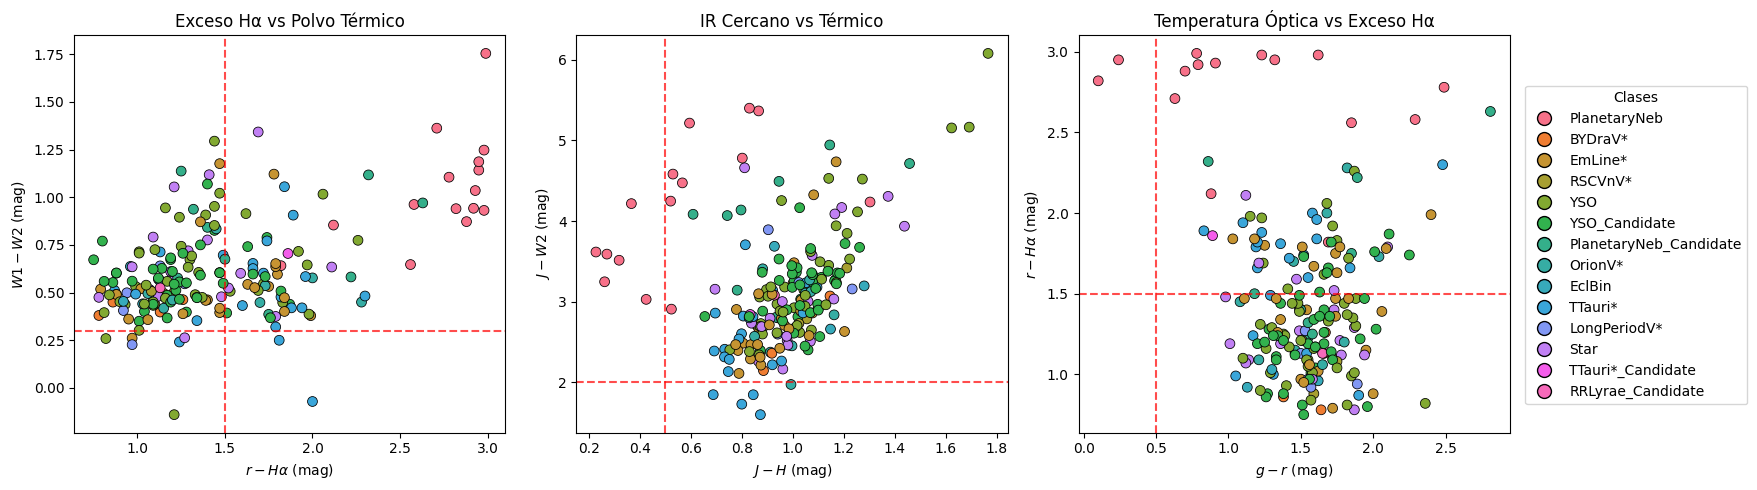

In [11]:
# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Diagrama 1: r-Ha vs W1-W2 ---
sns.scatterplot(
    x="r_Ha", y="W1_W2", 
    hue="main_type", palette=palette, 
    data=df, ax=axes[0], s=50, edgecolor='black',
    legend=False  # Sin leyenda individual
)
axes[0].axvline(1.5, color='red', linestyle='--', alpha=0.7)
axes[0].axhline(0.3, color='red', linestyle='--', alpha=0.7)
axes[0].set_xlabel(r"$r - H\alpha$ (mag)")
axes[0].set_ylabel(r"$W1 - W2$ (mag)")
axes[0].set_title("Exceso Hα vs Polvo Térmico")

# --- Diagrama 2: J-H vs H-W2 ---
sns.scatterplot(
    x="J_H", y="J_W2", 
    hue="main_type", palette=palette, 
    data=df, ax=axes[1], s=50, edgecolor='black',
    legend=False  # Sin leyenda individual
)
axes[1].axvline(0.5, color='red', linestyle='--', alpha=0.7)
axes[1].axhline(2.0, color='red', linestyle='--', alpha=0.7)
axes[1].set_xlabel(r"$J - H$ (mag)")
axes[1].set_ylabel(r"$J - W2$ (mag)")
axes[1].set_title("IR Cercano vs Térmico")

# --- Diagrama 3: g-r vs r-Ha ---
sns.scatterplot(
    x="g_r", y="r_Ha", 
    hue="main_type", palette=palette, 
    data=df, ax=axes[2], s=50, edgecolor='black',
    legend=False  # Sin leyenda individual
)
axes[2].axvline(0.5, color='red', linestyle='--', alpha=0.7)
axes[2].axhline(1.5, color='red', linestyle='--', alpha=0.7)
axes[2].set_xlabel(r"$g - r$ (mag)")
axes[2].set_ylabel(r"$r - H\alpha$ (mag)")
axes[2].set_title("Temperatura Óptica vs Exceso Hα")

# Crear leyenda única manualmente
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cls,
                          markerfacecolor=palette[i], markersize=10,
                          markeredgecolor='black')
                  for i, cls in enumerate(classes)]

fig.legend(handles=legend_elements, title="Clases",
           bbox_to_anchor=(0.85, 0.5), loc='center left',
           borderaxespad=0.)

# Ajustar layout para dejar espacio a la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Grouping

In [12]:

# 1. Crear mapeo de colores original
original_classes = df['main_type'].unique()
original_palette = sns.color_palette("husl", n_colors=len(original_classes))
original_color_dict = dict(zip(original_classes, original_palette))

In [13]:
# 2. Crear nueva columna con agrupaciones específicas
df['grouped_class'] = np.select(
    [
        df['main_type'].str.contains('PlanetaryNeb'),  # Grupo 1
        df['main_type'].str.contains('YSO|TTauri')     # Grupo 2
    ],
    [
        'PlanetaryNeb_Group',  # Clase unificada para PlanetaryNeb y candidatos
        'YSO_TTauri_Group'     # Clase unificada para YSO/TTauri y candidatos
    ],
    default=df['main_type']  # Clases no modificadas
)


In [14]:
# 3. Definir paleta de marcadores SOLO RELLENOS
unique_classes = df['grouped_class'].unique()
markers = ['o', 's', '^', 'D', '*', 'P', 'X', 'h', 'H', 'p']  # 10 marcadores rellenos
marker_dict = dict(zip(unique_classes, markers[:len(unique_classes)]))

In [15]:
# 4. Crear paleta de colores para clases agrupadas
grouped_color_dict = {}

for cls in unique_classes:
    if cls == 'PlanetaryNeb_Group':
        grouped_color_dict[cls] = original_color_dict['PlanetaryNeb']
    elif cls == 'YSO_TTauri_Group':
        grouped_color_dict[cls] = original_color_dict['YSO']
    else:
        grouped_color_dict[cls] = original_color_dict[cls]


In [16]:
PN = df[df["grouped_class"]=="PlanetaryNeb_Group"]
len(PN)

24

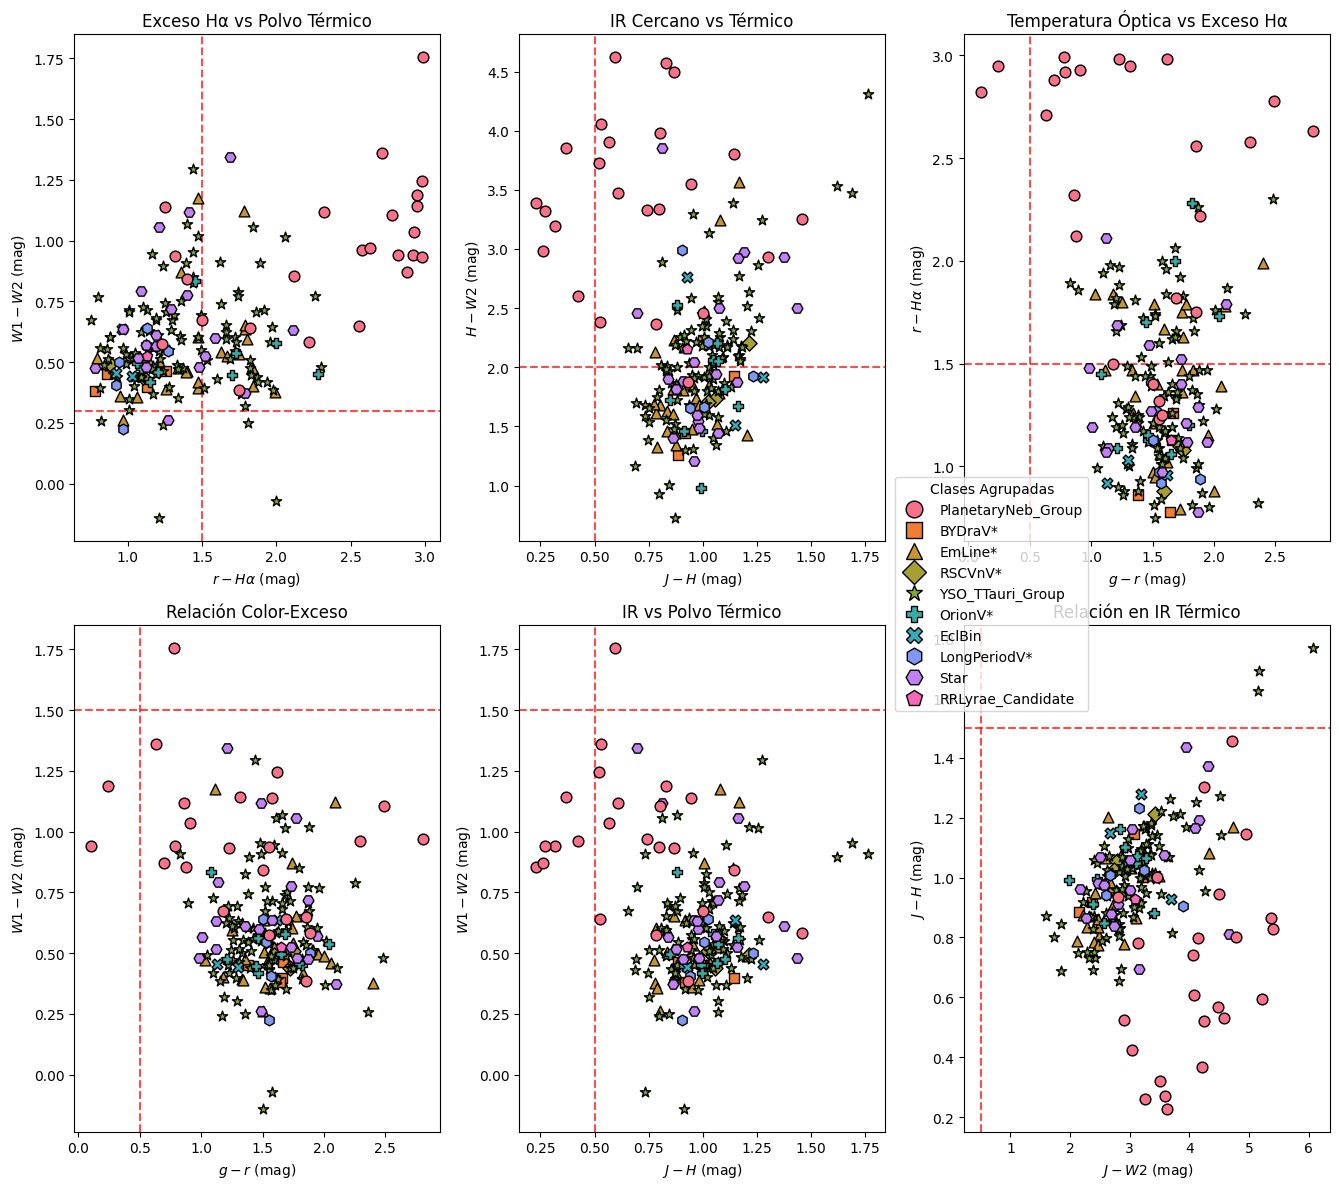

In [17]:
# 4. Crear subplots en formato 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Convertir matriz 2D en lista plana

# --- Configuración para cada gráfico ---
for i, ax in enumerate(axes):
    # Líneas guía personalizadas por posición
    if i == 0:
        ax.axvline(1.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(0.3, color='red', linestyle='--', alpha=0.7, zorder=1)
    elif i == 1:
        ax.axvline(0.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(2.0, color='red', linestyle='--', alpha=0.7, zorder=1)
    else:
        ax.axvline(0.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(1.5, color='red', linestyle='--', alpha=0.7, zorder=1)

# --- Función para graficar con zorder personalizado ---
def plot_with_zorder(ax, x, y, grouped_classes, color_dict, marker_dict, data):
    for cls in grouped_classes:
        subset = data[data['grouped_class'] == cls]
        z = 3 if cls == 'PlanetaryNeb_Group' else 2  # zorder prioritario
        ax.scatter(
            x=subset[x], y=subset[y],
            color=color_dict[cls],
            marker=marker_dict[cls],
            s=60,
            edgecolor='black',
            label=cls,
            zorder=z
        )

# --- Graficar cada subplot ---
# Diagrama 1: r-Ha vs W1-W2 (posición 0)
plot_with_zorder(
    ax=axes[0],
    x="r_Ha", y="W1_W2",
    grouped_classes=unique_classes,
    color_dict=grouped_color_dict,
    marker_dict=marker_dict,
    data=df
)
axes[0].set_xlabel(r"$r - H\alpha$ (mag)")
axes[0].set_ylabel(r"$W1 - W2$ (mag)")
axes[0].set_title("Exceso Hα vs Polvo Térmico")

# Diagrama 2: J-H vs H-W2 (posición 1)
plot_with_zorder(
    ax=axes[1],
    x="J_H", y="H_W2",
    grouped_classes=unique_classes,
    color_dict=grouped_color_dict,
    marker_dict=marker_dict,
    data=df
)
axes[1].set_xlabel(r"$J - H$ (mag)")
axes[1].set_ylabel(r"$H - W2$ (mag)")
axes[1].set_title("IR Cercano vs Térmico")

# Diagrama 3: g-r vs r-Ha (posición 2)
plot_with_zorder(
    ax=axes[2],
    x="g_r", y="r_Ha",
    grouped_classes=unique_classes,
    color_dict=grouped_color_dict,
    marker_dict=marker_dict,
    data=df
)
axes[2].set_xlabel(r"$g - r$ (mag)")
axes[2].set_ylabel(r"$r - H\alpha$ (mag)")
axes[2].set_title("Temperatura Óptica vs Exceso Hα")

# Diagrama 4: W1-W2 vs g-r (posición 3)
plot_with_zorder(
    ax=axes[3],
    x="g_r", y="W1_W2",
    grouped_classes=unique_classes,
    color_dict=grouped_color_dict,
    marker_dict=marker_dict,
    data=df
)
axes[3].set_xlabel(r"$g - r$ (mag)")
axes[3].set_ylabel(r"$W1 - W2$ (mag)")
axes[3].set_title("Relación Color-Exceso")

# Diagrama 5: W1-W2 vs J-H (posición 4)
plot_with_zorder(
    ax=axes[4],
    x="J_H", y="W1_W2",
    grouped_classes=unique_classes,
    color_dict=grouped_color_dict,
    marker_dict=marker_dict,
    data=df
)
axes[4].set_xlabel(r"$J - H$ (mag)")
axes[4].set_ylabel(r"$W1 - W2$ (mag)")
axes[4].set_title("IR vs Polvo Térmico")

# Diagrama 6: W1-W2 vs H-W2 (posición 5)
plot_with_zorder(
    ax=axes[5],
    x="J_W2", y="J_H",
    grouped_classes=unique_classes,
    color_dict=grouped_color_dict,
    marker_dict=marker_dict,
    data=df
)
axes[5].set_xlabel(r"$J - W2$ (mag)")
axes[5].set_ylabel(r"$J - H$ (mag)")
axes[5].set_title("Relación en IR Térmico")

# --- Crear leyenda única ---
legend_elements = [
    Line2D([0], [0],
           marker=marker_dict[cls],
           color='w',
           markerfacecolor=grouped_color_dict[cls],
           markersize=12,
           markeredgecolor='black',
           label=cls,
           linestyle='None')
    for cls in unique_classes
]

fig.legend(handles=legend_elements,
           title="Clases Agrupadas",
           bbox_to_anchor=(0.5, 0.5),
           loc='center left',
           borderaxespad=0.,
           frameon=True)

# --- Ajustes finales ---
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Espacio para leyenda
plt.show()

## More color color diagrams

In [18]:
# Lista de columnas de color definidas
color_columns = [
    "r_Ha", "g_Ha", "i_Ha", "W1_W2", "J_H", "H_W2", "J_W2",
    "g_r", "g_W1", "g_W2", "r_W1", "r_W2", "g_H", "g_J", "r_H", "r_J"
]

In [19]:
#Generar todas las combinaciones posibles (x, y) donde x != y
all_pairs = [(x, y) for x in color_columns for y in color_columns if x != y]

In [20]:
#
# Configuración de parámetros
plots_per_page = 20  # 4 filas x 5 columnas
num_pages = (len(all_pairs) + plots_per_page - 1) // plots_per_page

In [21]:
# Crear PDF para guardar todos los diagramas
with PdfPages('all_color_color_diagrams.pdf') as pdf:
    for page in range(num_pages):
        start = page * plots_per_page
        end = start + plots_per_page
        current_pairs = all_pairs[start:end]
        
        # Crear figura con subplots
        fig, axes = plt.subplots(4, 5, figsize=(22, 18))
        axes = axes.flatten()
        plt.subplots_adjust(hspace=0.5, wspace=0.4)
        
        # Configurar leyenda única
        legend_elements = [
            Line2D([0], [0], marker=marker_dict[cls], color='w',
                   markerfacecolor=grouped_color_dict[cls], markersize=10,
                   markeredgecolor='black', label=cls, linestyle='None')
            for cls in unique_classes
        ]
        
        # Generar cada subplot con zorder selectivo
        for idx, (x_col, y_col) in enumerate(current_pairs):
            ax = axes[idx]
            
            # Primero graficar todas las clases excepto PlanetaryNeb_Group
            for cls in [c for c in unique_classes if c != 'PlanetaryNeb_Group']:
                subset = df[df['grouped_class'] == cls]
                ax.scatter(
                    x=subset[x_col], y=subset[y_col],
                    color=grouped_color_dict[cls],
                    marker=marker_dict[cls],
                    s=50,
                    edgecolor='black',
                    label=cls if idx == 0 else "",  # Evitar etiquetas duplicadas
                    zorder=2
                )
            
            # Luego graficar PlanetaryNeb_Group encima
            subset_pne = df[df['grouped_class'] == 'PlanetaryNeb_Group']
            ax.scatter(
                x=subset_pne[x_col], y=subset_pne[y_col],
                color=grouped_color_dict['PlanetaryNeb_Group'],
                marker=marker_dict['PlanetaryNeb_Group'],
                s=50,
                edgecolor='black',
                label='PlanetaryNeb_Group' if idx == 0 else "",
                zorder=3  # Nivel superior
            )
            
            ax.set_title(f'{x_col} vs {y_col}', fontsize=10, pad=8)
            ax.set_xlabel(x_col, fontsize=8)
            ax.set_ylabel(y_col, fontsize=8)
            ax.tick_params(axis='both', which='major', labelsize=7)
        
        # Agregar leyenda y guardar página
        fig.legend(handles=legend_elements, title="Clases",
                   bbox_to_anchor=(0.98, 0.5), loc='center left',
                   borderaxespad=0., frameon=True)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

# Exploring the Noise groups

In [24]:
df_noise = pd.read_csv("../Class_wise_v4/Halpha_emitter_wise_noise-simbad.csv")
len(df_noise)

995

In [25]:
PN_noise = df_noise[df_noise["main_type"]=="PlanetaryNeb"]
PN_noise

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,R_x,J,H,K,u,g,r_xa,i,z,angDist_x
2,J194751.91+311818.2,296.966304,31.305043,66.858708,2.957180,572370-1-13529,0.056,99.0,0.05,0.95,...,NaN,14.838,14.669,14.373,NaN,NaN,NaN,NaN,NaN,0.055481
184,J212958.47+510400.3,322.493621,51.066746,93.987304,-0.117810,530083-2-5422,0.033,99.0,0.05,0.95,...,13.89,11.504,10.709,9.551,NaN,NaN,NaN,NaN,NaN,0.043161
835,J012544.65+613611.7,21.436047,61.603239,126.999539,-0.997270,367901-2-238,0.056,-1.0,1.00,0.00,...,NaN,15.480,13.220,11.492,NaN,NaN,19.026,17.856,NaN,0.201902
878,J194907.22+211742.0,297.280095,21.294996,58.360169,-2.344546,461030-4-12053,0.028,-1.0,1.00,0.00,...,NaN,13.583,11.884,10.494,NaN,NaN,16.770,15.992,NaN,0.027791
984,J193943.35+262933.0,294.930637,26.492499,61.792434,2.110654,455775-4-9719,0.054,-1.0,1.00,0.00,...,16.14,11.786,9.432,7.345,NaN,NaN,NaN,NaN,NaN,0.037144
